In [107]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# to see the graph visuals
%matplotlib inline

In [108]:
# Read in the Pandas DataFrame
# df = pd.read_csv("bluetooth.csv")
df = pd.read_csv("bluetooth_connection_attempts.csv")
df.columns

Index(['Timestamp', 'Device_ID', 'Connection_Type', 'Signal_Strength',
       'Device_Type', 'Authentication_Method', 'Data_Transferred',
       'Connection_Duration', 'Connection_Location', 'Connection_Status',
       'Anomaly_Flag', 'Device_OS', 'User_ID'],
      dtype='object')

In [109]:
df = df.drop(columns = ["User_ID", "Timestamp", "Device_OS", "Device_Type", "Connection_Location"])

In [110]:
# df_numeric = df.apply(pd.to_numeric, errors = "coerce")
# df_numeric

<Axes: >

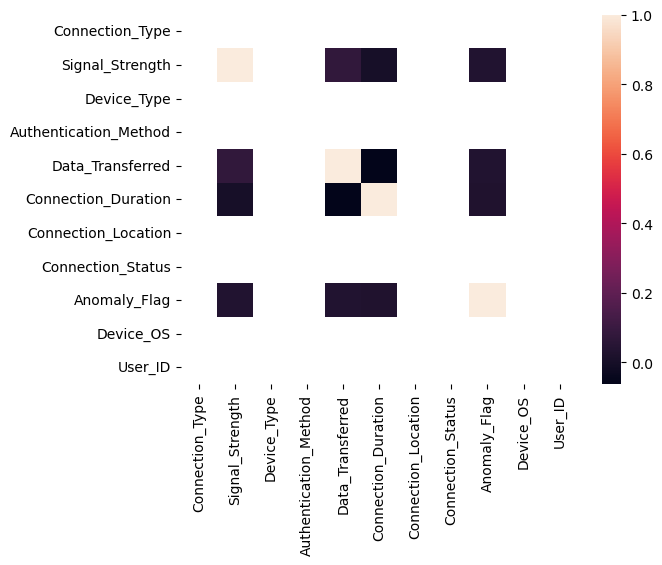

In [113]:
# plt.figure(figsize = (10, 8))
sns.heatmap(df_numeric.corr())
# plt.show

In [102]:
# import statsmodels.api as sm
# # (d.i) Define relevant variables for OLS models
# X = df.Anomaly_Flag
# Y = df.Connection_Status

# # (d.ii) Create required constant
# sm.add_constant(X)

# # (d.iv) Print summary table
# analysis = sm.OLS(endog=Y , exog= X).fit().summary()
# print(analysis)

# Check for null or NA data

In [103]:
# See how much of remaining data is null 
# Check for missing values
df.isnull().sum()

Timestamp                  0
Device_ID                  0
Connection_Type            0
Signal_Strength            0
Device_Type                0
Authentication_Method    340
Data_Transferred           0
Connection_Duration        0
Connection_Location        0
Connection_Status          0
Anomaly_Flag               0
Device_OS                  0
User_ID                    0
dtype: int64

# Visualization
## Data Cleaning

In [104]:
# Building correlation matrix
# sns.heatmap(df.corr())

Connection_Status
Failed        33.465347
Successful    34.545455
Name: Authentication_Method, dtype: float64


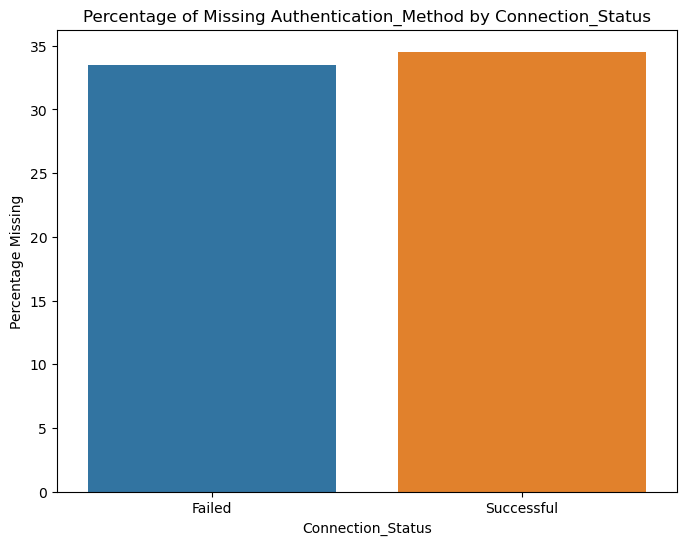

In [105]:
# Investigate why the 'Authentication_Method' column has missing values. 
# This is an important step because understanding the reason behind missing 
# data can guide us in how to handle it appropriately. In this case, 
# we have a hypothesis that failed connections might not have an authentication method recorded, 
# which is plausible.

# Visualize this relationship

# Calculate the percentage of missing Authentication_Method for each Connection_Status
missing_auth_by_status = df.groupby('Connection_Status')['Authentication_Method'].apply(lambda x: x.isnull().mean() * 100)
print(missing_auth_by_status)

plt.figure(figsize=(8, 6))
sns.barplot(x=missing_auth_by_status.index, y=missing_auth_by_status.values)
plt.title('Percentage of Missing Authentication_Method by Connection_Status')
plt.ylabel('Percentage Missing')
plt.show()

Device_Type
Laptop        32.539683
Smartphone    36.250000
Smartwatch    32.567050
Tablet        34.817814
Name: Authentication_Method, dtype: float64


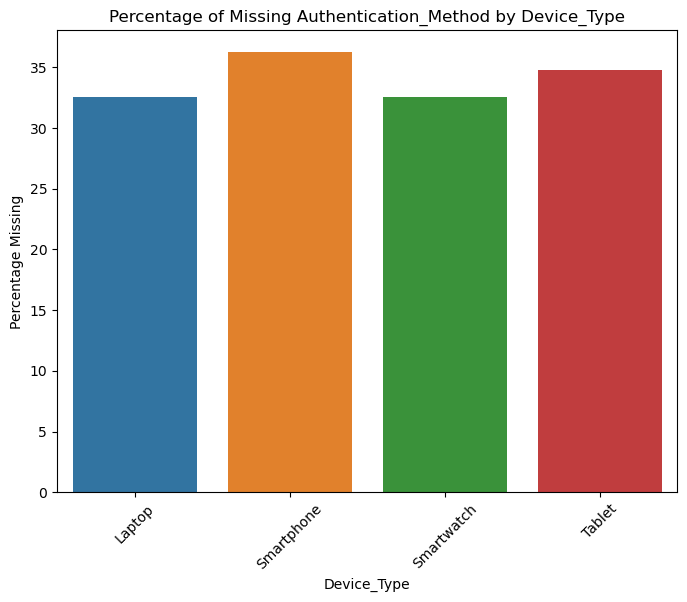

In [106]:
# Check if missing 'Authentication_Method' is related to specific 'Device_Type'
missing_auth_by_device = df.groupby('Device_Type')['Authentication_Method'].apply(lambda x: x.isnull().mean() * 100)
print(missing_auth_by_device)

plt.figure(figsize=(8, 6))
sns.barplot(x=missing_auth_by_device.index, y=missing_auth_by_device.values)
plt.title('Percentage of Missing Authentication_Method by Device_Type')
plt.ylabel('Percentage Missing')
plt.xticks(rotation=45)
plt.show()

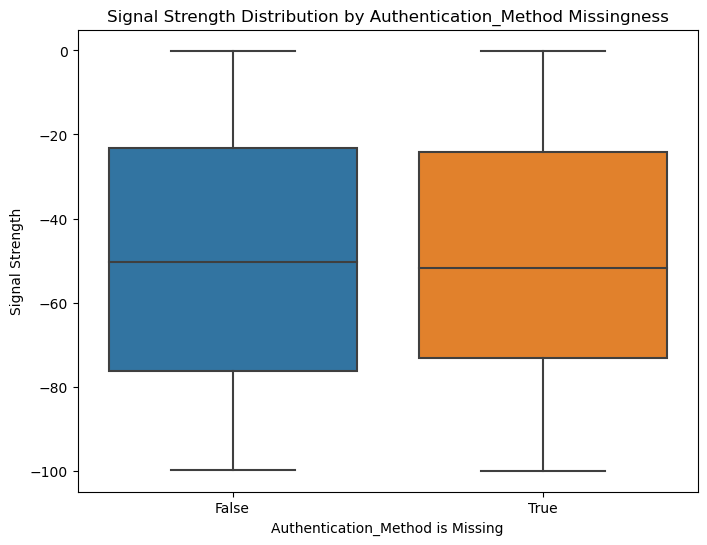

In [39]:
# Examine the relationship between 'Signal_Strength' and missing 'Authentication_Method'

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Authentication_Method'].isnull(), y=df['Signal_Strength'])
plt.title('Signal Strength Distribution by Authentication_Method Missingness')
plt.xlabel('Authentication_Method is Missing')
plt.ylabel('Signal Strength')
plt.show()

In [12]:
# Check if 'Data_Transferred' is zero for rows with missing 'Authentication_Method'
print(df[df['Authentication_Method'].isnull()]['Data_Transferred'].mean())
print(df[df['Authentication_Method'].notnull()]['Data_Transferred'].mean())

497.0820169071797
493.75809728192894


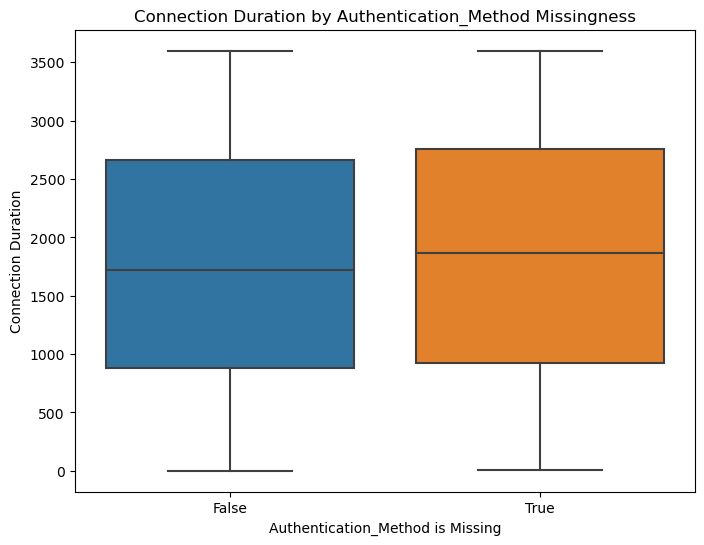

In [13]:
#  'Connection_Duration' for missing vs. non-missing 'Authentication_Method
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Authentication_Method'].isnull(), y=df['Connection_Duration'])
plt.title('Connection Duration by Authentication_Method Missingness')
plt.xlabel('Authentication_Method is Missing')
plt.ylabel('Connection Duration')
plt.show()

# Very short durations for missing authentication could suggest that the connection 
# was dropped before authentication could occur.

Connection_Type
Automatic    32.040816
Manual       35.882353
Name: Authentication_Method, dtype: float64


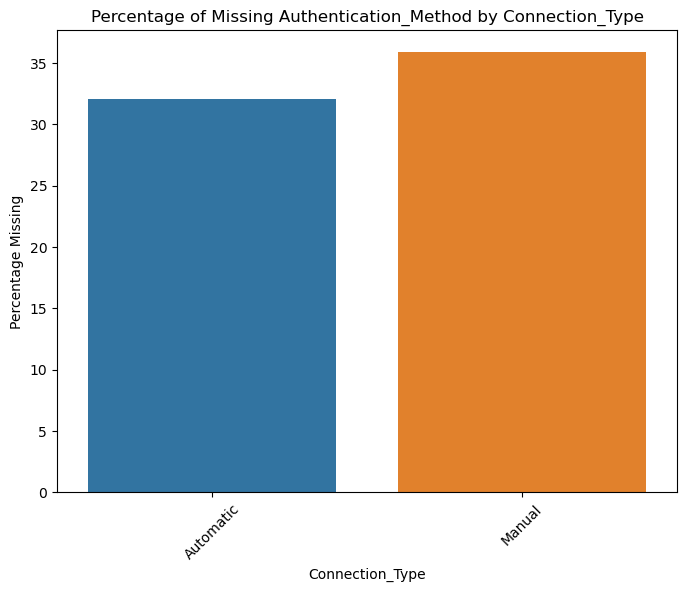

In [40]:
# Check if missing 'Authentication_Method' is more common for specific 'Connection_Type':

missing_auth_by_conn_type = df.groupby('Connection_Type')['Authentication_Method'].apply(lambda x: x.isnull().mean() * 100)
print(missing_auth_by_conn_type)

plt.figure(figsize=(8, 6))
sns.barplot(x=missing_auth_by_conn_type.index, y=missing_auth_by_conn_type.values)
plt.title('Percentage of Missing Authentication_Method by Connection_Type')
plt.ylabel('Percentage Missing')
plt.xticks(rotation=45)
plt.show()

Anomaly_Flag
0    36.947791
1    31.075697
Name: Authentication_Method, dtype: float64


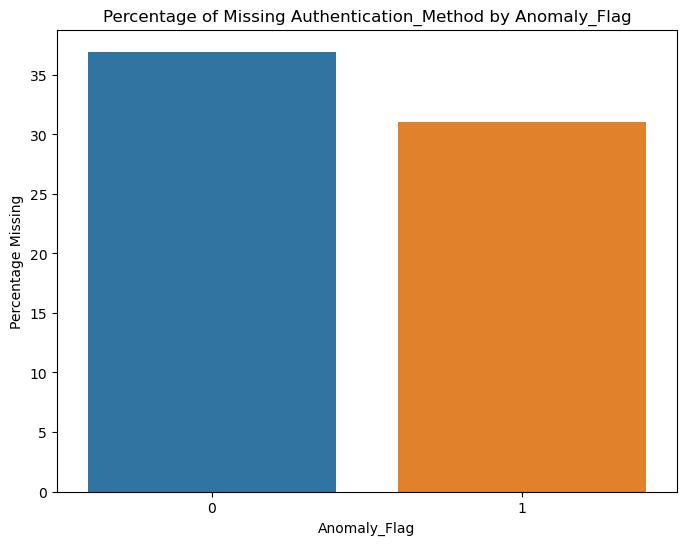

In [15]:
# Analyze the relationship between 'Anomaly_Flag' and missing 'Authentication_Method
missing_auth_by_anomaly = df.groupby('Anomaly_Flag')['Authentication_Method'].apply(lambda x: x.isnull().mean() * 100)
print(missing_auth_by_anomaly)

plt.figure(figsize=(8, 6))
sns.barplot(x=missing_auth_by_anomaly.index, y=missing_auth_by_anomaly.values)
plt.title('Percentage of Missing Authentication_Method by Anomaly_Flag')
plt.ylabel('Percentage Missing')
plt.xlabel('Anomaly_Flag')
plt.show()

In [41]:
# fill with a placeholder (e.g., 'Unknown') or drop rows
print(df['Authentication_Method'].fillna('Unknown', inplace=True))

# check or handle duplicates
print(df.drop_duplicates(inplace=True))

# drop any rows that have na
df = df.dropna()
df.shape

None
None


(1000, 13)

In [42]:
df['Anomaly_Flag'].value_counts()

Anomaly_Flag
1    502
0    498
Name: count, dtype: int64

<Axes: xlabel='Anomaly_Flag', ylabel='count'>

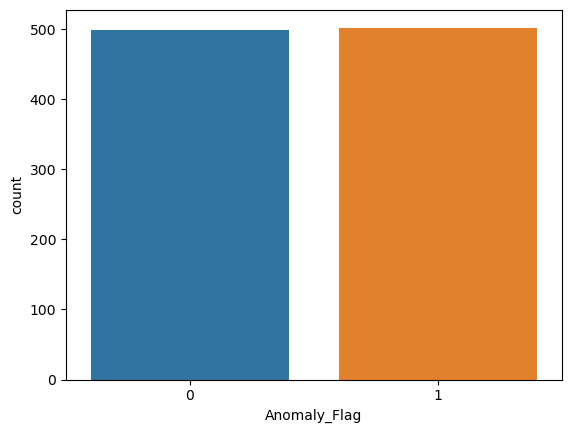

In [18]:
sns.countplot(data=df, x='Anomaly_Flag')

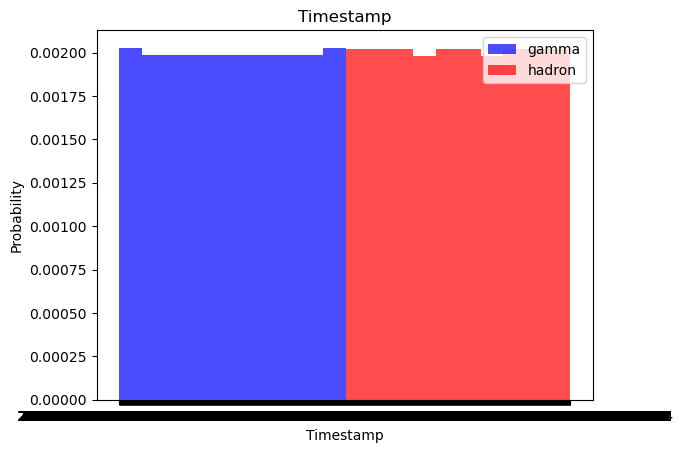

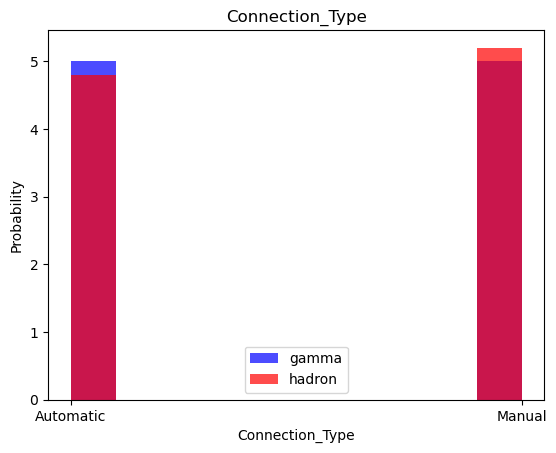

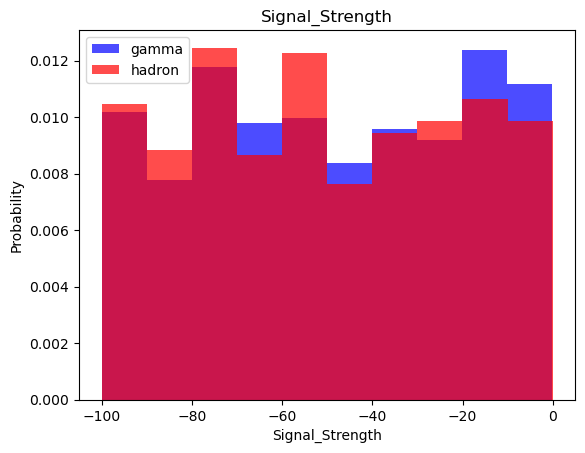

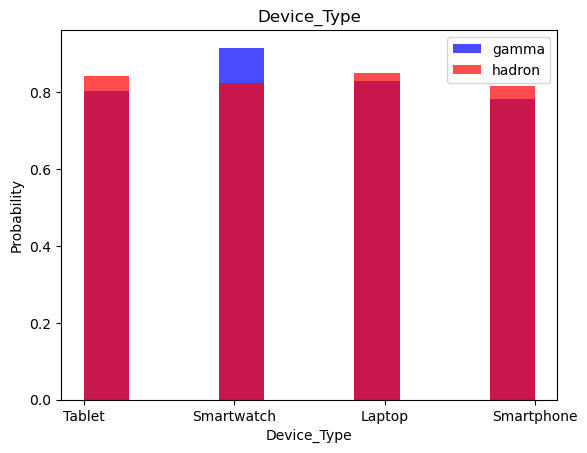

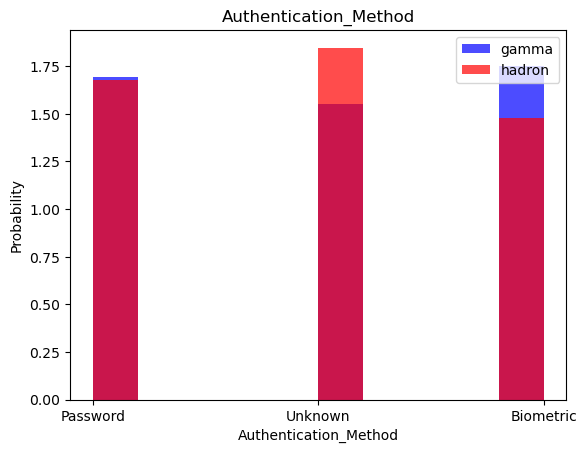

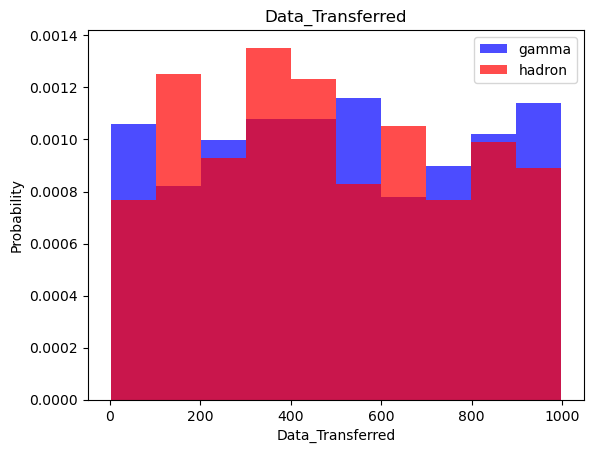

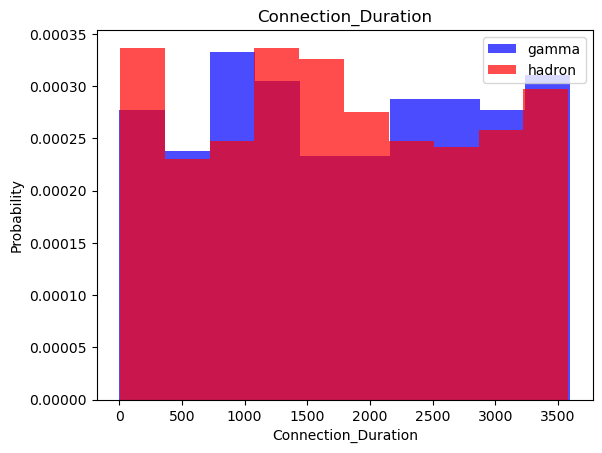

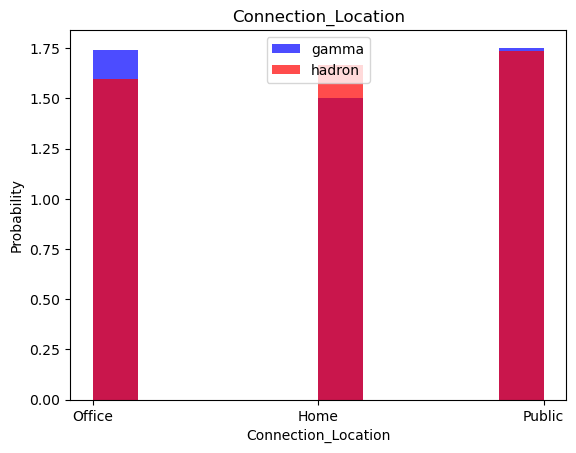

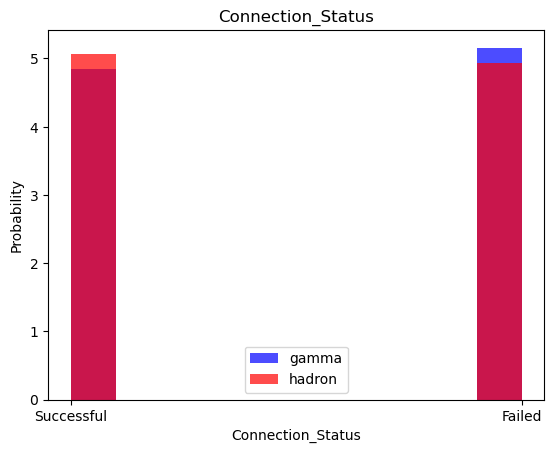

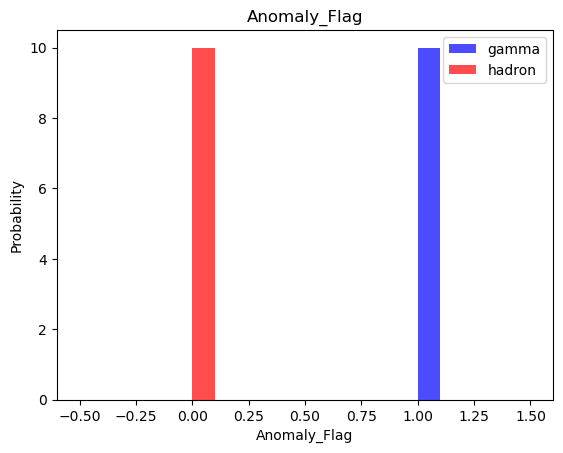

In [19]:
cols = ["Timestamp", "Connection_Type", "Signal_Strength", "Device_Type", "Authentication_Method"
    ,"Data_Transferred", "Connection_Duration", "Connection_Location", "Connection_Status", "Anomaly_Flag"
    ,"Device_OS"
]

for label in cols[:-1]:
    plt.hist(df[df["Anomaly_Flag"] == 1][label], color = 'blue', label = 'gamma', alpha = 0.7, density = True)
    plt.hist(df[df["Anomaly_Flag"] == 0][label], color = 'red', label = 'hadron', alpha = 0.7, density = True)
    plt.title(label)
    plt.ylabel('Probability')
    plt.xlabel(label)
    plt.legend()
    plt.show()

# Split Data for Training

In [43]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
# from imblearn.over_sampling import RandomOverSampler

train, valid, test = np.split( df.sample(frac = 1), [int(0.6 * len(df)), int(0.8 * len(df))])

In [85]:
# unbalance
print(len(train[train["Anomaly_Flag"] == 1])) # gamma
print(len(train[train["Anomaly_Flag"] == 0])) # hadron
train

311
289


,Timestamp,Device_ID,Connection_Type,Signal_Strength,Device_Type,Authentication_Method,Data_Transferred,Connection_Duration,Connection_Location,Connection_Status,Anomaly_Flag,Device_OS,User_ID
633,2023-03-17 21:24:51.263463,Device_82,Manual,-16.032145,Laptop,Biometric,108.123883,2159.820794,Public,Failed,1,WearOS,User_91
322,2023-06-03 01:29:24.301918,Device_15,Manual,-76.588190,Laptop,Unknown,665.997390,3345.285788,Public,Failed,0,WearOS,User_8
67,2023-01-28 20:52:53.589979,Device_92,Manual,-31.171361,Laptop,Unknown,229.325478,982.124871,Home,Failed,0,Android,User_29
944,2023-01-24 07:00:51.701234,Device_18,Manual,-56.635415,Tablet,Unknown,761.162964,3310.893504,Home,Failed,1,watchOS,User_3
505,2023-04-16 18:41:56.706887,Device_82,Manual,-93.084740,Tablet,Biometric,616.319612,1627.860048,Public,Failed,0,WearOS,User_69
...,...,...,...,...,...,...,...,...,...,...,...,...,...
611,2023-06-11 17:46:04.538899,Device_65,Automatic,-13.712686,Smartwatch,Password,723.937462,522.623196,Public,Successful,0,iOS,User_69
88,2023-05-11 23:21:37.788056,Device_38,Manual,-16.059614,Tablet,Unknown,340.332853,2040.057192,Office,Successful,1,WearOS,User_92
376,2023-05-26 10:47:13.366887,Device_87,Manual,-37.674390,Smartwatch,Unknown,402.837929,2937.892568,Office,Successful,0,Android,User_25
143,2023-03-30 01:08:11.203401,Device_86,Automatic,-29.581938,Smartwatch,Password,940.552188,1290.339364,Office,Failed,1,Android,User_55


In [86]:
from sklearn.model_selection import train_test_split

# First let's get the class labels 
y = df['Anomaly_Flag']

# And drop them from X (which loses the column headers)
X = df.drop(['Anomaly_Flag'], axis=1)

# Convert y labels to NumPy array for learning
y = np.array(y)

print(f"X: {X.shape} of type {type(X)}")
print(f"y: {y.shape} of type {type(y)}")

X: (1000, 10) of type <class 'pandas.core.frame.DataFrame'>
y: (1000,) of type <class 'numpy.ndarray'>


In [87]:
# NOTE: Don't need to standardize/normalize the features, they're all already on the same small scale

# Split the data.  Let's do a 80/10/10 split for train/val/test
X_train, X_, y_train, y_ = train_test_split(X, y, test_size=0.2, random_state=42)        # 20% goes to temp variable
X_val, X_test, y_val, y_test = train_test_split(X_, y_, test_size=0.5, random_state=42)  # which is then split in half to make val and test sets

# Try adding a dimension here to fix training issue, not learning.  ==>  Wasn't an issue, dropping this.
# y_train = np.expand_dims(y_train, axis=1)
# y_val = np.expand_dims(y_val, axis=1)
# y_test = np.expand_dims(y_test, axis=1)

# Confirm sizes and types.  Note that all X are converted to NumPy ndarrays!
print(f"X_train: {X_train.shape} of type {type(X_train)}")
print(f"y_train: {y_train.shape} of type {type(y_train)}\n")

print(f"X_val: {X_val.shape} of type {type(X_val)}")
print(f"y_val: {y_val.shape} of type {type(y_val)}\n")

print(f"X_test: {X_test.shape} of type {type(X_test)}")
print(f"y_test: {y_test.shape} of type {type(y_test)}\n")

X_train: (800, 10) of type <class 'pandas.core.frame.DataFrame'>
y_train: (800,) of type <class 'numpy.ndarray'>

X_val: (100, 10) of type <class 'pandas.core.frame.DataFrame'>
y_val: (100,) of type <class 'numpy.ndarray'>

X_test: (100, 10) of type <class 'pandas.core.frame.DataFrame'>
y_test: (100,) of type <class 'numpy.ndarray'>

